**Connect Google Drive:**

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries:**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

**Load Dataset:**

In [67]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Track/Datasets/Student_Performance.csv")

# display first few rows
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Final_score
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


**Encoding:**

In [68]:
# Encode categorical feature
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Final_score                       10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


**Visualization to overview dataset:**

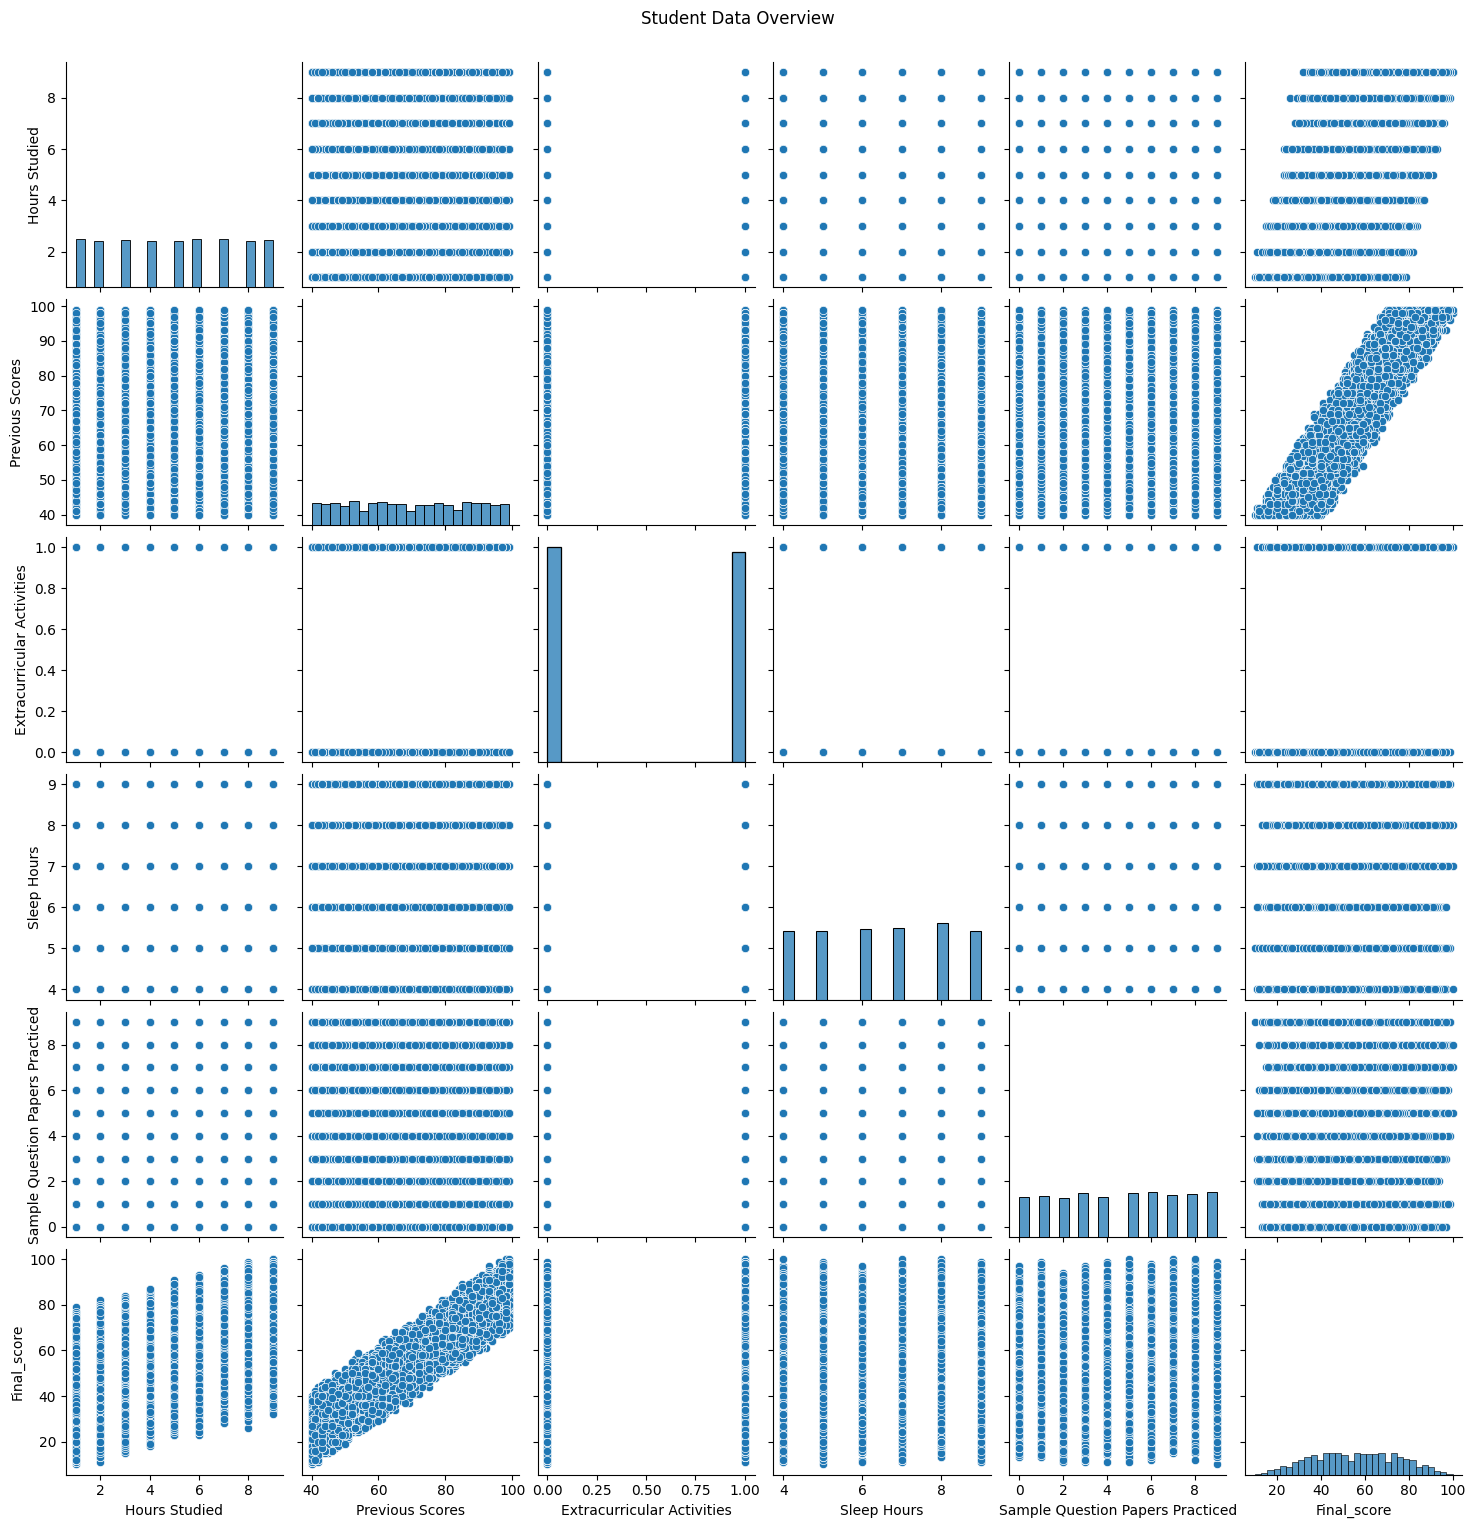

In [69]:
# Basic Visualization
sns.pairplot(df)
plt.suptitle("Student Data Overview", y=1.02)
plt.show()

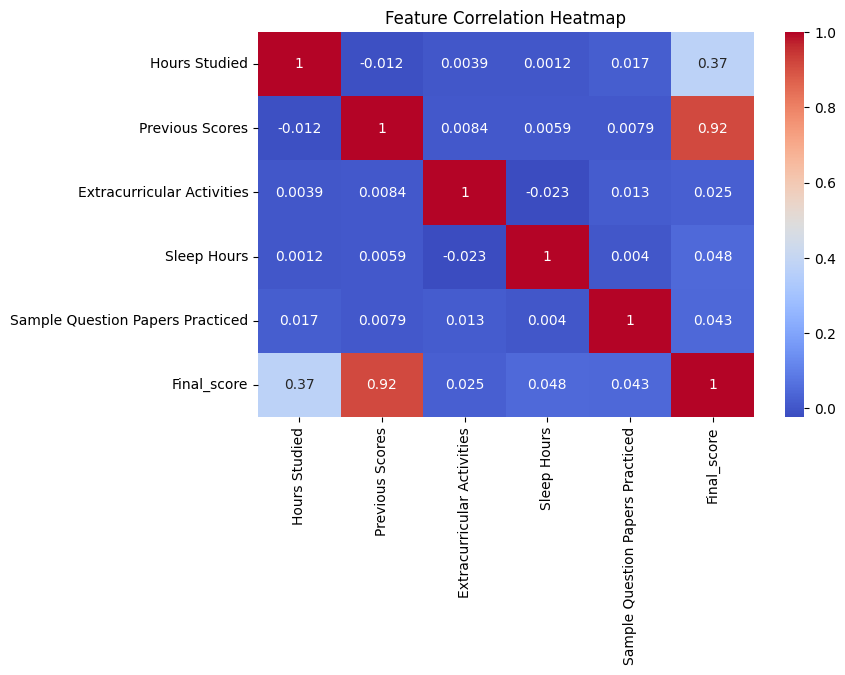

In [70]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Feature Selection or Data Splitting:**

In [71]:
# Feature Selection
X = df.drop('Final_score', axis=1)
y = df['Final_score']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training:**

In [72]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

**Model Evaluation:**

In [73]:
# Prediction
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Linear Regression Performance:
R2 Score: 0.9889832909573145
MSE: 4.082628398521853


**Plot Prediction:**

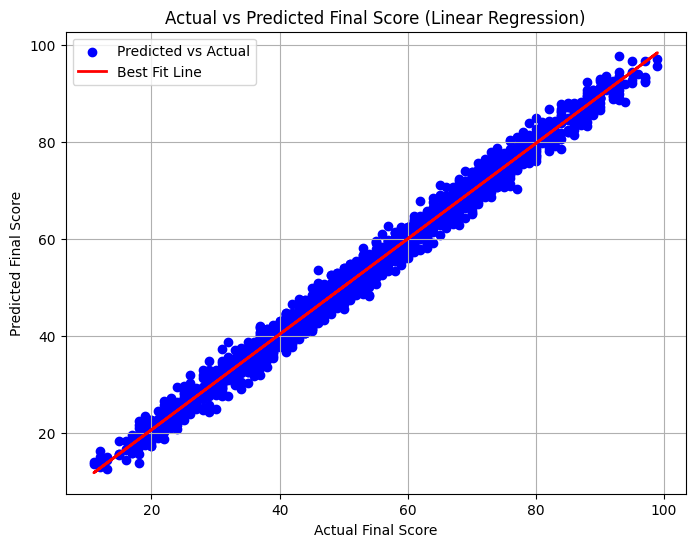

In [74]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# Add regression line
line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.poly1d(line)(y_test), color='red', linewidth=2, label='Best Fit Line')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Score (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()


**Polynomial Regression Training:**


In [75]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_poly_pred = poly_model.predict(X_test_p)


**Polynomial Regression Evaluation:**

In [76]:
# Evaluation
print("\nPolynomial Regression Performance:")
print("R2 Score:", r2_score(y_test_p, y_poly_pred))
print("MSE:", mean_squared_error(y_test_p, y_poly_pred))


Polynomial Regression Performance:
R2 Score: 0.9889886481405492
MSE: 4.080643106151406


**Plot Visualization:**

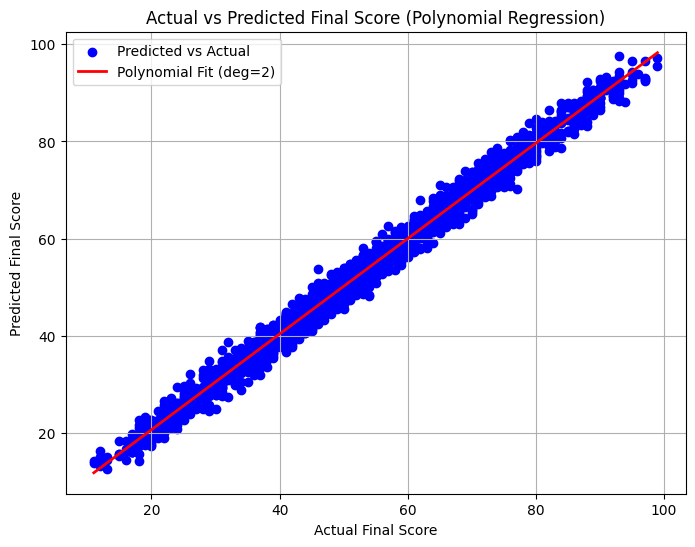

In [77]:
# Scatter plot with polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(y_test_p, y_poly_pred, color='blue', label='Predicted vs Actual')

# Fit a best-fit 2nd degree curve (polynomial) between actual and predicted
coeffs = np.polyfit(y_test_p, y_poly_pred, deg=2)
poly_eq = np.poly1d(coeffs)

# Sort values for smooth plotting
sorted_indices = np.argsort(y_test_p)
y_test_sorted = np.array(y_test_p)[sorted_indices]
y_poly_sorted = poly_eq(y_test_sorted)

# Plot the polynomial curve
plt.plot(y_test_sorted, y_poly_sorted, color='red', linewidth=2, label='Polynomial Fit (deg=2)')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Score (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.show()
